# **BIG BASKET** **ANALYSIS**
Step 1: Load DataSet.

Step 2: Use head function to look for first 12 rows.

Step 3: Get Description of the data in the DataFrame.

Step 4: Find Information about the DataFrame.

Step 5: Find out Top &amp; least sold products.

Step 6: Measuring discount on a certain item.

Step 7: Find out the Missing Values from the Dataset.

Step 8: Find out the outliers from the dataset according tothe columns
and fill them with the mean.

Step 9: Create Plots or visualizations.

#Step 1: Load DataSet.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/BigBasket Products.csv')

In [8]:
df.drop('index',axis=1,inplace = True)           #Droping index column
df.drop('description',axis=1,inplace = True)     #Droping description column


In [9]:
df.brand.value_counts().head(10)

,count
brand,
Fresho,638
bb Royal,539
BB Home,428
DP,250
Fresho Signature,171
bb Combo,168
Amul,153
INATUR,146
Himalaya,141


In [10]:
df.sample(5)

,product,category,sub_category,brand,sale_price,market_price,type,rating
14552,Pickle - Ready Mix,"Foodgrains, Oil & Masala",Masalas & Spices,Eastern,28.5,38.0,Blended Masalas,4.1
7149,Certified Organic - Pumpkin Seeds/Kumbalakayi ...,"Foodgrains, Oil & Masala",Dry Fruits,Nourish You,199.0,199.0,Other Dry Fruits,4.3
8002,Nawabi Meat Masala,"Foodgrains, Oil & Masala",Masalas & Spices,Keya,80.0,160.0,Blended Masalas,4.1
26997,Triphla Ras,Beauty & Hygiene,Health & Medicine,Meghdoot,195.0,195.0,Ayurveda,NaN
1073,White Perfect - Clinical New Skin Essence Lotion,Beauty & Hygiene,Skin Care,Loreal Paris,995.0,995.0,Face Care,NaN


In [11]:
#Data Briefing
print('nBrands:',df.brand.nunique())
print('ntypes:',df.type.nunique())
print('ncategory:',df.category.nunique())
print('nsub_category:',df.sub_category.nunique())
print('category:',(df.sale_price != df.market_price).sum())

nBrands: 2313
ntypes: 426
ncategory: 11
nsub_category: 90
category: 15234


#Step 2: Use head function to look for first 12 rows

In [12]:
df.head(12)

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4
5,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3
6,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6
7,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5
9,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3


#Step 3: Get Description of the data in the DataFrame.

In [13]:
df.describe().round(0)

,sale_price,market_price,rating
count,27549.0,27555.0,18919.0
mean,335.0,382.0,4.0
std,1202.0,582.0,1.0
min,2.0,3.0,1.0
25%,95.0,100.0,4.0
50%,190.0,220.0,4.0
75%,359.0,425.0,4.0
max,112475.0,12500.0,5.0


In [50]:
df.brand[(df.market_price>10000)] #check brand more than 10000 price

,brand
1056,Prestige
12669,Braun
21761,Farmina
23082,Prestige
25301,Wahl


#Step 4: Find Information about the DataFrame.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27549 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18919 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.7+ MB


#Step 5: Find out Top & least sold products

In [16]:
df.groupby('category')['sale_price'].sum().sort_values(ascending=False).round()

,sale_price
category,
Beauty & Hygiene,3404749.0
"Kitchen, Garden & Pets",1927634.0
Gourmet & World Food,1522115.0
Cleaning & Household,693761.0
"Foodgrains, Oil & Masala",516870.0
Snacks & Branded Foods,364610.0
Baby Care,326317.0
Beverages,212187.0
"Bakery, Cakes & Dairy",121525.0


#Step 6: Measuring discount on a certain item.

In [17]:
df.insert(6,'discount',df.market_price-df.sale_price)

#Step 7: Find out the Missing Values from the Dataset.

In [18]:
df.isnull().sum()

,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
discount,6
type,0
rating,8636


In [19]:
#filling the missing values
df['rating']=df.rating.fillna(df.rating.median())
df['sale_price']=df.sale_price.fillna(df.market_price.median())
df.brand = df.brand.fillna('unknown')
df['discount']=df.discount.fillna(0)
df['product'] = df['product'].fillna('unknown')

In [20]:
df.brand.value_counts().head(10)

,count
brand,
Fresho,638
bb Royal,539
BB Home,428
DP,250
Fresho Signature,171
bb Combo,168
Amul,153
INATUR,146
Himalaya,141


In [21]:
df.groupby('brand')['sale_price'].sum().head(10)

,sale_price
brand,
&Me,745.0
&Stirred,1570.0
109°F,99.0
137 Degree,445.0
18 Herbs,7900.0
1mg,495.0
1st Bites,515.0
24 Mantra,12442.9
3 Roses,1151.2


In [22]:
#concat the bb & BB
a = df[df['brand'].str.startswith('bb ')].brand
b = df[df['brand'].str.startswith('BB ')].brand

In [23]:
c = pd.concat([df[df['brand'].str.startswith('bb ')],df[df['brand'].str.startswith('BB ')]])

In [24]:
c.head(5)

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating
35,Dhania - Dal,"Foodgrains, Oil & Masala",Masalas & Spices,bb Royal,98.0,120.0,22.0,Whole Spices,4.1
84,Exo Dishwash Bar- Round 700 gm Box + Pril Dish...,Cleaning & Household,Detergents & Dishwash,bb Combo,95.0,114.0,19.0,Dishwash Bars & Powders,4.1
266,Mustard/Sasive/Rai - Big,"Foodgrains, Oil & Masala",Masalas & Spices,bb Royal,30.0,50.0,20.0,Whole Spices,4.2
281,Toor/Arhar Dal,"Foodgrains, Oil & Masala",Dals & Pulses,bb Popular,128.0,160.0,32.0,"Toor, Channa & Moong Dal",4.1
328,Henko Detergent Bar - Stain Care 250 gm + Mr. ...,Cleaning & Household,Detergents & Dishwash,bb Combo,87.0,95.0,8.0,Detergent Bars,4.1


In [25]:
#diffrence of sale price and discount
print(df.sale_price.sum().round())
print(df.discount.sum().round())

9220549.0
1307731.0


In [28]:
# checking the sale price and market price insights
df[df.sale_price>df.market_price]

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating
248,4mm Aluminium Induction Base Chapati Roti Tawa...,"Kitchen, Garden & Pets",Cookware & Non Stick,HAZEL,111649.0,1289.0,-110360.0,Tawa & Sauce Pan,4.1
288,Arrabbiata Tomato Pasta Sauce With Chilli,Gourmet & World Food,"Sauces, Spreads & Dips",Montanini,22325.0,325.0,-22000.0,Mustard & Cheese Sauces,5.0
412,Original Care Lip Balm For 24h Moisture With S...,Beauty & Hygiene,Skin Care,Nivea,1114.8,140.0,-974.8,Lip Care,4.3
436,"Balloon - Polka Dot, 12 Inch",Cleaning & Household,Party & Festive Needs,B Vishal,88899.0,129.0,-88770.0,"Caps, Balloons & Candles",3.9
1249,Beard Kit,Beauty & Hygiene,Men's Grooming,Uncle Tony,112475.0,3300.0,-109175.0,Combos & Gift Sets,4.1
1719,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,220.0,20.0,0.0,Camphor & Wicks,4.1
1720,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,220.0,46.0,0.0,Blended Masalas,4.1
1722,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,220.0,65.0,0.0,Breakfast & Snack Mixes,4.1
2401,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,220.0,150.0,0.0,Battery & Electrical,4.0
2402,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,220.0,32.0,0.0,Toilet Paper,3.9


In [29]:
# If sale_price is greater than 15000, replace it with market_price
df.loc[df.sale_price > 15000, 'sale_price'] = df.loc[df.sale_price > 15000, 'market_price']
# discount in negative adjusted with 0
df.loc[df.discount < 0, 'discount'] = 0

#Step 9: Create Plots or visualizations.

# Plot sale price and category by bar plot

/tmp/ipython-input-42-135766727.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




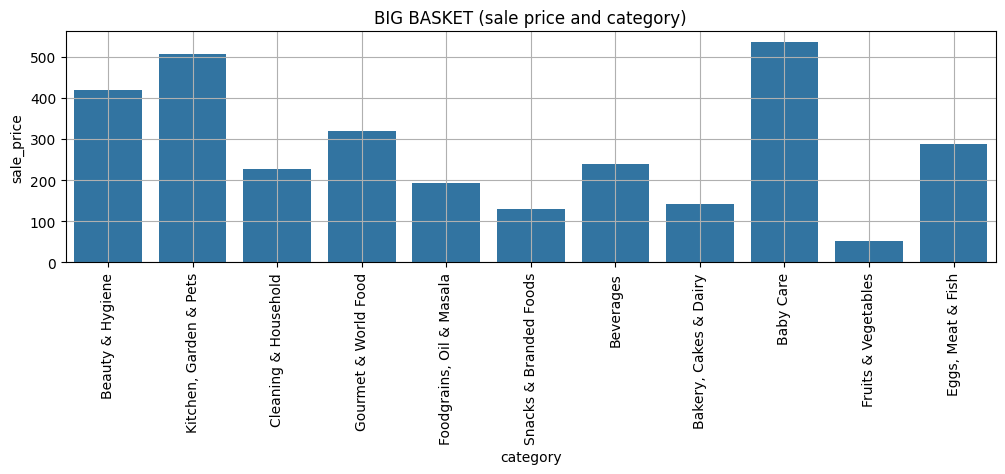

In [42]:
# plot sale price and category by bar plot
plt.figure(figsize=(12,3))
sns.barplot(x=df.category,y=df.sale_price,ci=None)
plt.title('BIG BASKET (sale price and category)')
plt.grid()
plt.xticks(rotation=90)
plt.show()

# Visualize sale price & discount by line graph

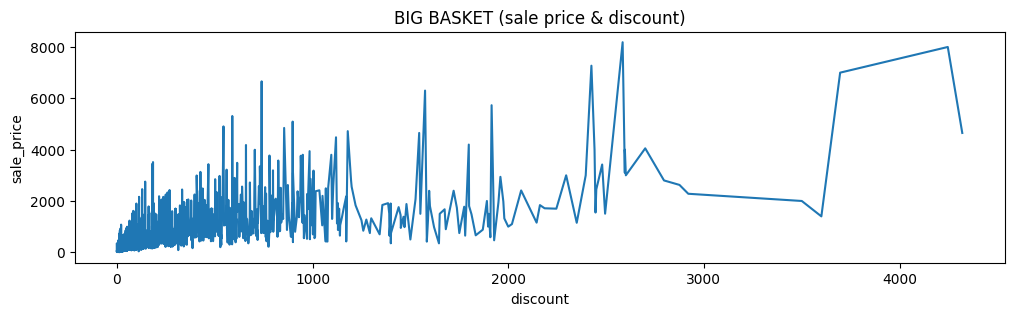

In [36]:
# visualize sale price & discount by line graph
plt.figure(figsize=(12,3))
sns.lineplot(x=df.discount,y=df.sale_price,errorbar=None)
plt.title('BIG BASKET (sale price & discount)')
plt.show()


#Visualize the pie chart for understanding the category

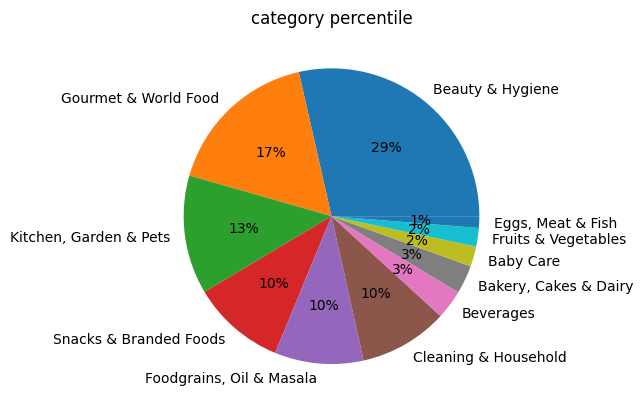

In [33]:
#Vsualize the pie chart for understanding the category
plt.title("category percentile")
plt.pie(df.category.value_counts(),labels=df.category.value_counts().index,autopct='%1.0f%%')
plt.show()

#Scattering for understanding the category

In [39]:
df[df.sale_price<12000]

,product,category,sub_category,brand,sale_price,market_price,discount,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,0.00,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,0.00,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,131.00,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,27.00,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,0.00,Bathing Bars & Soaps,4.4
...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,49.80,Perfume,3.9
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,7.50,"Herbs, Seasonings & Rubs",4.0
27552,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,0.00,Nachos & Chips,3.8
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,99.00,Tea Bags,4.2


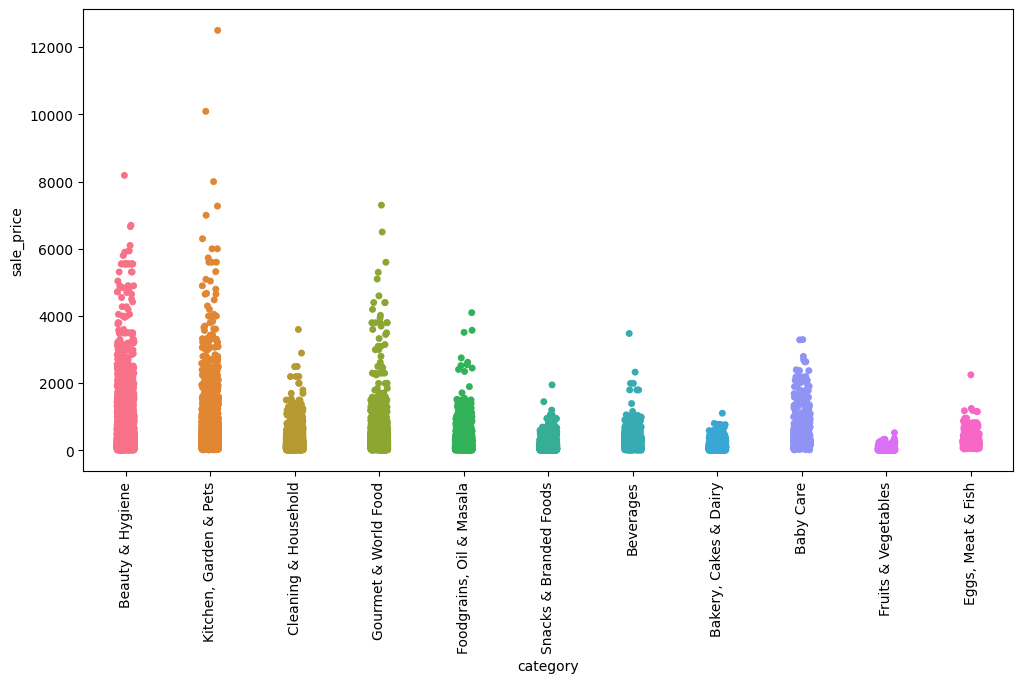

In [34]:
#scattering for understanding the category
plt.figure(figsize=(12,6))
sns.stripplot(y=df.sale_price,x=df.category,hue=df.category)
plt.xticks(rotation=90)
plt.show()

#Discount by BB

In [37]:
df.discount.sum()

np.float64(1639010.66)

In [35]:
df.sale_price.sum()-df.discount.sum()

np.float64(7251232.869999999)

Checking discount more than 1000 on 5 rating product

In [73]:
df[(df.discount>1000)&(df.rating==5)] #checking discount more than 1000 on 5 rating product


,product,category,sub_category,brand,sale_price,market_price,discount,type,rating
2365,Pro Expert Nutrition Large Breed Puppy (3-18 M...,"Kitchen, Garden & Pets",Pet Food & Accessories,Pedigree,4480.0,5600.0,1120.0,Pet Meals & Treats,5.0
11725,Platinum Triply Stainless Steel Induction Base...,"Kitchen, Garden & Pets",Cookware & Non Stick,Vinod,2199.0,3250.0,1051.0,Cook And Serve,5.0
15649,Pro Signature Range - Vitamin C Brightening Fa...,Beauty & Hygiene,Skin Care,Aroma Magic,2940.0,4900.0,1960.0,Face Care,5.0
17835,Spin Mop - Jet,Cleaning & Household,"Mops, Brushes & Scrubs",Gala,2199.0,3499.0,1300.0,"Mops, Wipers",5.0
19178,"Stainless Steel Dinner Set - Apple Shape, Lase...","Kitchen, Garden & Pets",Steel Utensils,Kitchen Essentials,3999.0,6440.0,2441.0,Plates & Tumblers,5.0
21372,Opalware Ivory 2 Dinner Set - Ivory Blush,"Kitchen, Garden & Pets",Crockery & Cutlery,Laopala Diva,2589.0,3695.0,1106.0,Dinner Sets,5.0
21833,"Spice Bottles - Metal, Nested With Stand, Copper","Kitchen, Garden & Pets",Storage & Accessories,Home Puff,869.0,1999.0,1130.0,Racks & Holders,5.0
24165,Passion Femme Eau De Toilette,Beauty & Hygiene,Fragrances & Deos,Police,1323.0,2450.0,1127.0,Eau De Toilette,5.0
26710,Copper Water Mug/Cup - Hammered,"Kitchen, Garden & Pets",Steel Utensils,Frestol,599.0,1612.0,1013.0,Plates & Tumblers,5.0


In [75]:
df.discount.max()#checking the maximum discount

4320.0

**Ploting the discount more than 1000 and rating is 5**

In [104]:
px.scatter(x=df.rating,y=df.discount,color=df.discount,size=df.sale_price)

Which brand is mostly in stock

In [105]:
px.bar(x=df.brand.value_counts().index,y=df.brand.value_counts(),template='plotly_dark')